# Homework 5
### Author: Yichen Xie
### NetID: yx2606
The main goal of this homework is to use what we have learned from white-box models to understand a black-box model's behavior.

We are still going to use the loan application dataset as in the practice 2. Find it here: https://drive.google.com/file/d/186LjbAZoMat91ByH7aJGJ8PnfO2LqKlu/view?usp=sharing

Don't forget to specify the filepath on your own Google Drive below.


You will need to finish the following subtasks:
- (1) Train a surrogate tree-based model to understand the model prediction behaviors of the provided SVM model. 
- (2) Answer a few questions based on the interpretation of the surrogate model.


In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm


In the column of "Outcome",
- 0 represents "will not default",
- 1 represents "will default".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Colab Notebooks/cleaned_fico_data.csv",)
df

,Outcome,External Risk Estimate,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,...,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,77,8,1,1,69
1,0,61,58,15,41,2,4,4,100,150,...,67,0,0,0,0,57,0,2,0,0
2,0,67,66,5,24,9,0,0,100,150,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,150,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,1,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,81,5,2,0,100
9867,0,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
9868,0,74,129,6,64,18,1,1,100,150,...,33,3,4,4,6,53,5,3,0,56
9869,0,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,47,4,1,0,38


In [ ]:
feature_labels = df.columns[1:]
feature_labels

Index(['External Risk Estimate', 'Months Since Oldest Trade Open',
       'Months Since Last Trade Open', 'Average Months in File',
       'Satisfactory Trades', 'Trades 60+ Ever', 'Trades 90+ Ever',
       'Bills Paid on Time', 'Months Since Last Delq.', 'Max Delq. Last 12M',
       'Max Delq. Ever', 'Total Trades', 'Trades Open Last 12M',
       '% Installment Trades', 'Months Since Most Recent Inq',
       'Inq Last 6 Months', 'Inq Last 6 Months exl. 7 days', 'Unpaid Balance',
       'Installment Burden', 'Revolving Trades w/ Balance',
       'Installment Trades w/ Balance',
       'Bank Trades w/ High Utilization Ratio', '% Trades w/ Balance'],
      dtype='object')

In [ ]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''train a SVM model'''
clf = svm.SVC(kernel="linear", C=0.001, probability=True)
clf.fit(X_train, y_train)

SVC(C=0.001, kernel='linear', probability=True)

In [ ]:
print("training accuracy:", clf.score(X_train, y_train))
print("testing accuracy:", clf.score(X_test, y_test))


training accuracy: 0.7310030395136778
testing accuracy: 0.7281012658227848


## Please train a surrogate model to approximate the original model's behavior on the **test set**?

How can we do that?

We can use the original model input (`X_test`), and the model output (but not the labels/ground truth) to train an interpretable surrogate model, for example, a decision tree, or a rule set.


Please include your surrogate model training code below. You can add or remove any code blocks.

In [ ]:
from sklearn.utils.extmath import randomized_range_finder
'''train a decision tree model'''
from sklearn import tree

y_pred = clf.predict(X_test)
tclf = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=16,max_features=None)
tclf = tclf.fit(X_test,y_pred)

In [ ]:
tclf.feature_importances_

array([0.83411271, 0.        , 0.        , 0.04959098, 0.08159444,
       0.        , 0.0061632 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00517709, 0.        ,
       0.        , 0.        , 0.01262986, 0.        , 0.        ,
       0.        , 0.        , 0.01073172])

In [ ]:
print("tree accuracy:", tclf.score(X_test, y_test))

tree accuracy: 0.7281012658227848


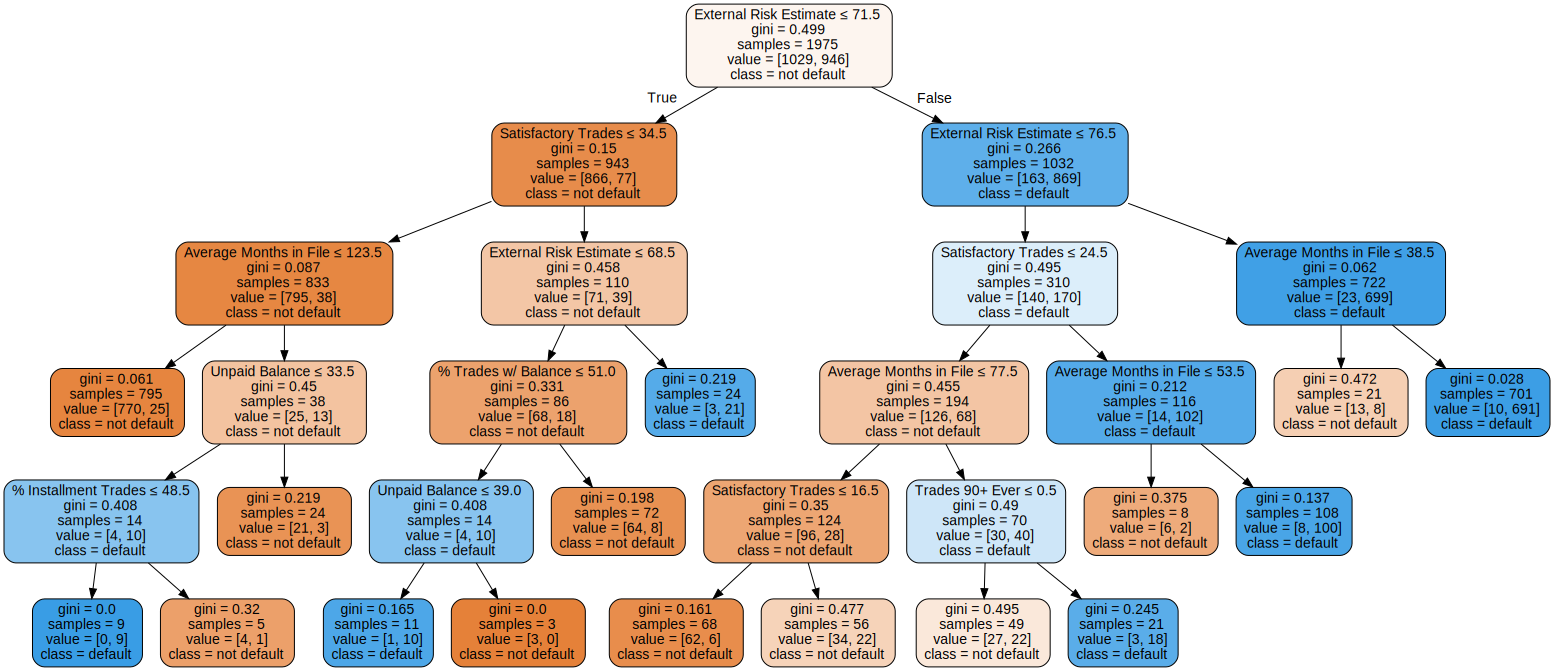

In [ ]:
'''visualize the tree'''
import graphviz

target_names = ['not default', 'default']
dot_data = tree.export_graphviz(tclf, out_file=None, 
                                feature_names=df.columns[1:],
                                class_names=target_names,
                                filled=True, rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)  
graph 

## Question Answering
Please answer the following questions based on the surrogate model you have trained.  

(1) What features are important when the original model makes predictions? List the top 5 features that yout think are mostly important. 

(2) Please explain why you choose the parameters you used to train the surrogate tree.

(3) When a person is predicted as "will default" in the future, what may the loan application look like? Describe the application using no more than 3 features. And what's your reason for this description?

(4) Imagine that you are going to deploy this SVM model for the actual business department, please list 3 questions about this SVM model's behavior that you want to know before the actual deployment, and whether they can be answered by the surrogate tree. 
(Notice: This question is not to judege how well you can do something, just to help you understand the role of model interpretation in the whole pipeline. So you can just list whatever you want to talk about.)




======== You can run some code and answer the questions based on what you see from the result ========

## Answers:

(1) As we can see from the sorted feature importance of SVM (abs of coefficients):

In [ ]:
clf_importance_dict = {}
for i in range(len(feature_labels)):
  clf_importance_dict[feature_labels[i]] = abs(clf.coef_[0][i])

sorted(clf_importance_dict.items(),key=lambda x:x[1],reverse=True)

[('Bank Trades w/ High Utilization Ratio', 0.08367101872603473),
 ('Inq Last 6 Months', 0.06525559353610239),
 ('Revolving Trades w/ Balance', 0.0550022644795075),
 ('External Risk Estimate', 0.05139966538638607),
 ('Satisfactory Trades', 0.03371883821511443),
 ('Trades 90+ Ever', 0.02951346299062084),
 ('Inq Last 6 Months exl. 7 days', 0.02400864840426256),
 ('Max Delq. Ever', 0.01833433381043059),
 ('Max Delq. Last 12M', 0.01565425668497694),
 ('Trades Open Last 12M', 0.0156310967624127),
 ('Installment Trades w/ Balance', 0.010551192305833079),
 ('Bills Paid on Time', 0.009741363977618211),
 ('Unpaid Balance', 0.008254163142750376),
 ('% Installment Trades', 0.008069753198259921),
 ('Average Months in File', 0.007028373256606879),
 ('Months Since Last Trade Open', 0.005833915985326177),
 ('Total Trades', 0.004438647389754899),
 ('% Trades w/ Balance', 0.003827560433305552),
 ('Months Since Last Delq.', 0.0027672282809957094),
 ('Installment Burden', 0.0020749789629171678),
 ('Months

The most important features in original model are "Bank Trades w/ High Utilization Ratio", "Inq Last 6 Months", "Revolving Trades w/ Balance", "External Risk Estimate" and "Satisfactory Trades".

(2) I used "max_depth=5,max_leaf_nodes=16,max_features=None" in the construction of this decision tree.

I have tried "max_depth=None", and as a result the depth of the tree is about 10 layers. It is too deep for us to analyze and an obviously overfitting result. So I reduce the max depth to 5 layers, and the accuracy of Decision Tree is almost the same as that of SVM, which means the depth of the decision tree is already enough for evaluating the results:

In [ ]:
print("testing accuracy:", clf.score(X_test, y_test))
print("tree accuracy:", tclf.score(X_test, y_test))

testing accuracy: 0.7281012658227848
tree accuracy: 0.7281012658227848


In addition, I set max_leaf_nodes=16, becasue 16 leaf nodes is enough for a 5 layer binary tree. More leaf nodes will make the tree more complex.

(3) The loan application may have features of:

External Risk Estimate > 76.5

Average Months in File > 38.5

Because there are samples of "will default" appears under these conditions in the surrogate tree.

(4) **Question1** : Can we know about which feature is the most important in SVM from the surrogate model?

The result from the surrogate model is not so reliable to show the importance of features in SVM. 

In [ ]:
tclf_importance_dict = {}
for i in range(len(feature_labels)):
  tclf_importance_dict[feature_labels[i]] = abs(tclf.feature_importances_[i])

sorted(tclf_importance_dict.items(),key=lambda x:x[1],reverse=True)

[('External Risk Estimate', 0.8341127137028844),
 ('Satisfactory Trades', 0.0815944388382948),
 ('Average Months in File', 0.04959097983714356),
 ('Unpaid Balance', 0.012629860548308294),
 ('% Trades w/ Balance', 0.010731718752891518),
 ('Trades 90+ Ever', 0.006163200174172459),
 ('% Installment Trades', 0.00517708814630487),
 ('Months Since Oldest Trade Open', 0.0),
 ('Months Since Last Trade Open', 0.0),
 ('Trades 60+ Ever', 0.0),
 ('Bills Paid on Time', 0.0),
 ('Months Since Last Delq.', 0.0),
 ('Max Delq. Last 12M', 0.0),
 ('Max Delq. Ever', 0.0),
 ('Total Trades', 0.0),
 ('Trades Open Last 12M', 0.0),
 ('Months Since Most Recent Inq', 0.0),
 ('Inq Last 6 Months', 0.0),
 ('Inq Last 6 Months exl. 7 days', 0.0),
 ('Installment Burden', 0.0),
 ('Revolving Trades w/ Balance', 0.0),
 ('Installment Trades w/ Balance', 0.0),
 ('Bank Trades w/ High Utilization Ratio', 0.0)]

As we can see from the lists above, the order of feature importance changes in the surrogate tree. So we cannot figure out the feature importance of the original model from the surrogate model.

**Question2** : Why SVM and the surrogate Decision Tree focus on different features but they still have a similar accuracy?

I think it is because some of the features are correlated, so their importance for classification can be replaced by each other. And as a result, if one of those correlated features is used, the others will less likely to be considered.

Another reason is that the surrogate tree is trained by the prediction results of SVM. So the aim of the tree is to imitate the results of SVM instead of the real distribution of the data, regardless of how the SVM works.

**Question3** : Should we use a more complex kernel in the SVM?

Maybe we should. As we can see from the surrogate tree, the rules for detecting one specific class is still complicated. The leaf nodes with the same class is not so dense, which means the data in this linear space is still not so easily distinguishable. Using another kernel may map the data into a larger space, and make the data easier to classify.